In [1]:
%run load_data.ipynb
print (dir())

['DataFrame', 'In', 'Math', 'Out', 'SIZE_RATIO_CUT', 'SNR_CUT', 'Series', 'T_CUT', 'Table', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'bottleneck', 'display', 'exit', 'filter_by_snr', 'fits', 'get_df_list', 'get_ipython', 'h5py', 'i', 'index_2_3', 'index_2_3_true', 'index_2_3_true_negative', 'index_2_3_true_positive', 'index_4_5', 'index_4_5_true', 'index_4_5_true_negative', 'index_4_5_true_positive', 'load_mcal', 'load_true', 'mcal_df_list', 'mcal_df_list_negative', 'mcal_df_list_positive', 'np', 'numexpr', 'pd', 'photdf', 'plt', 'quit', 'tqdm', 'true_df_list']


In [2]:
import healpy as hp
import astropy_healpix as a_hp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Choose NSIDE

In [3]:
NSIDE=256 #or 512
NPIX=hp.nside2npix(NSIDE)
print ("The number of pixels is: {}.".format(NPIX))
G_INDEX=np.arange(NPIX)

The number of pixels is: 786432.


In [4]:
final_df_list=[None]*4
for i,catalog in enumerate(mcal_df_list_positive):
    final_df_list[i]=pd.concat([catalog,photdf[['true_cm_g_1','true_cm_g_2']]],axis=1,join='inner')

In [5]:
def get_healpix(df):
    print ("The length of the df is: {}.".format(len(df)))
    print ("The ratio of the length of the catagory to the total pixel number is: {:.2%}".format(len(df)/NPIX))
    df['ipix']=df.apply(lambda x:hp.ang2pix(NSIDE,np.pi/2-np.deg2rad(x['dec']),np.deg2rad(x['ra']),nest=True),axis=1)
    print("The propotion of rendered objects is: {:.2%}".format(np.sum(df['ipix']!=0)/len(df)))
    print ("Resetting indexes")
    df_ipix=df.set_index('ipix')
    df_ipix_sorted=df_ipix.sort_index()
    return (df_ipix_sorted)

def group_ipix(df_ipix_sorted):
    number_mask=df_ipix_sorted.groupby('ipix').count()['R11']<10
    df_sorted_grouped=df_ipix_sorted.groupby('ipix').mean()
    df_sorted_grouped_masked=df_sorted_grouped[number_mask]
    print ("The mean of R11 is {}, max is {}, min is {}".format(df_sorted_grouped_masked['R11'].mean(),df_sorted_grouped_masked['R11'].max(),df_sorted_grouped_masked['R11'].min()))
    print ("The mean of R22 is {}, max is {}, min is {}".format(df_sorted_grouped_masked['R22'].mean(),df_sorted_grouped_masked['R22'].max(),df_sorted_grouped_masked['R22'].min()))
    R11 = df_sorted_grouped_masked['R11'].mean()
    R22 = df_sorted_grouped_masked['R22'].mean()
    df_sorted_grouped_masked['delta_g1']=df_sorted_grouped_masked.apply(lambda x:x['e_1']/R11-x['true_cm_g_1'],axis=1)
    df_sorted_grouped_masked['delta_g2']=df_sorted_grouped_masked.apply(lambda x:x['e_2']/R22-x['true_cm_g_2'],axis=1)
#     print ("The propotion of averaged objects is: {:.2%}".format((len(df_ipix_sorted)-len(df_sorted_grouped_masked))/len(df_ipix_sorted)))
    print ("---------------------------------")
    return (df_sorted_grouped_masked)

In [6]:
ipix_sorted = [get_healpix(df) for df in final_df_list]

The length of the df is: 272818.
The ratio of the length of the catagory to the total pixel number is: 34.69%
The propotion of rendered objects is: 100.00%
Resetting indexes
The length of the df is: 272818.
The ratio of the length of the catagory to the total pixel number is: 34.69%
The propotion of rendered objects is: 100.00%
Resetting indexes
The length of the df is: 215145.
The ratio of the length of the catagory to the total pixel number is: 27.36%
The propotion of rendered objects is: 100.00%
Resetting indexes
The length of the df is: 215145.
The ratio of the length of the catagory to the total pixel number is: 27.36%
The propotion of rendered objects is: 100.00%
Resetting indexes


In [7]:
ipix_sorted_filtered_grouped=[group_ipix(df) for df in ipix_sorted]

The mean of R11 is 0.78644835142623, max is 13.67369349540634, min is -6.992034474310287
The mean of R22 is 0.7855622549926757, max is 10.63652140008755, min is -12.231064460480107


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


---------------------------------
The mean of R11 is 0.7750157162403251, max is 17.03993360179426, min is -6.842691657484413
The mean of R22 is 0.7847042804545312, max is 21.176713510351416, min is -32.04549961794578
---------------------------------
The mean of R11 is 0.8033524948405488, max is 23.548710983418214, min is -28.97834777796125
The mean of R22 is 0.7952090302924671, max is 36.132887083895895, min is -24.31547881220993
---------------------------------
The mean of R11 is 0.7722151369321218, max is 7.48179347176924, min is -26.84834620190807
The mean of R22 is 0.81033143757935, max is 17.67501272412899, min is -10.426019279742748
---------------------------------


In [8]:
def fill_for_plot(df,key_array):
    df_filled=df[key_array].reindex(index=G_INDEX,fill_value=np.nan)
    print("The propotion of filled pixels is: {}.".format(np.sum(df_filled['delta_g1']>0)/NPIX))
    return(df_filled)

In [9]:
hp_filled_list=[fill_for_plot(df,['delta_g1','delta_g2']) for df in ipix_sorted_filtered_grouped]

The propotion of filled pixels is: 0.002887725830078125.
The propotion of filled pixels is: 0.0029856363932291665.
The propotion of filled pixels is: 0.003414154052734375.
The propotion of filled pixels is: 0.003734588623046875.


In [10]:
ls

Untitled.ipynb     difference.ipynb  load_data.ipynb
correlation.ipynb  healpix.ipynb     mcal.ipynb


In [11]:
fig1,(ax1,ax2)=plt.subplots(ncols=2)

plt.axes(ax1)
hp.mollview(hp_filled_list[0]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /w MOF",hold=True)
hp.graticule()

plt.axes(ax2)
hp.mollview(hp_filled_list[1]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /wo MOF",hold=True)
hp.graticule()



plt.title('HEALPix comparison')

plt.savefig('/home/cz136/project/balrog/image/hp/sample_delta_g1.png',dpi=2048)
plt.close()

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/healpy/projaxes.py:11

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

plt.axes(ax1)
hp.mollview(np.random.random(hp.nside2npix(32)), hold=True)

plt.axes(ax2)
hp.mollview(np.arange(hp.nside2npix(32)), hold=True)

plt.close()

# Compare maps

In [13]:
maps=h5py.File('/home/cz136/project/balrog/data/Y3_GOLD_2_2_1_maps.h5','r')['maps'] #no neighbor

In [14]:
gold=h5py.File('/home/cz136/project/balrog/data/Y3_GOLD_2_2_1_maps.h5','r')

In [15]:
list(gold.keys())

['maps']

In [16]:
list(gold['maps'].keys())

['det_frac',
 'ebv_planck13',
 'g',
 'hpix',
 'i',
 'r',
 'star_density_piffv23',
 'z']

In [17]:
# ['det_frac', Effective coverage fraction of each pixel(normalized to 1)
#  'ebv_planck13', E(B-V)
#  'g',
#  'hpix',
#  'i',
#  'r',
#  'star_density_piffv23', star density
#  'z']

In [18]:
gold['maps']['det_frac'][:].max()

1.0

In [19]:
gold['maps']['det_frac'][:].max()

1.0

In [20]:
maps['g']['sigma_zp'][:][maps['g']['sigma_zp'][:]>0][0:50]

array([1.093e-02, 9.793e-03, 1.010e-02, 1.119e-02, 1.057e-02, 1.124e-02,
       1.124e-02, 1.124e-02, 1.124e-02, 1.124e-02, 1.124e-02, 1.124e-02,
       1.124e-02, 1.124e-02, 1.124e-02, 1.108e-02, 1.124e-02, 1.124e-02,
       1.124e-02, 1.108e-02, 1.108e-02, 8.727e-03, 8.727e-03, 8.265e-03,
       1.108e-02, 8.727e-03, 8.727e-03, 8.265e-03, 8.265e-03, 1.072e-02,
       1.072e-02, 1.123e-02, 1.124e-02, 1.124e-02, 1.124e-02, 1.108e-02,
       1.108e-02, 8.727e-03, 8.727e-03, 8.265e-03, 1.108e-02, 8.727e-03,
       8.793e-03, 8.265e-03, 8.265e-03, 1.072e-02, 1.072e-02, 1.123e-02,
       8.265e-03, 1.072e-02])

In [21]:
# ['airmass', airmass 
#  'fwhm', fwhm of psf
#  'mof_depth', no of coadd images
#  'sigma_zp', 
#  'sky_var',
#  'teff_mean', 
#  'teff_sum']

In [22]:
list(maps['g'].keys())
for key in maps['g'].keys():
    print (key,len(maps['g'][key]))

airmass 25169981
fwhm 25169981
mof_depth 25169981
sigma_zp 25169981
sky_var 25169981
teff_mean 25169981
teff_sum 25169981


In [23]:
for key in maps.keys():
    print ("{:20} has {} objects".format(key,len(maps[key])))

det_frac             has 25169981 objects
ebv_planck13         has 25169981 objects
g                    has 7 objects
hpix                 has 25169981 objects
i                    has 7 objects
r                    has 7 objects
star_density_piffv23 has 25169981 objects
z                    has 7 objects


In [24]:
ipix_maps={}
GOLD_INDEX=np.arange(hp.nside2npix(4096))
for key in ['ebv_planck13','star_density_piffv23','det_frac']:
    hpix=np.full(hp.nside2npix(4096),hp.UNSEEN)
    hpix[maps['hpix']]=maps[key]
    ipix_maps[key]=np.array(hpix)

In [25]:
gold_df=pd.DataFrame(data=ipix_maps,index=GOLD_INDEX)

In [26]:
band_columns=pd.MultiIndex.from_product([['g','r','i','z'],
                                       ['airmass','fwhm','mof_depth','sigma_zp','sky_var','teff_mean','teff_sum']],
                                     names=['band','data'])

In [27]:
gold_df_band=pd.DataFrame(index=G_INDEX,columns=band_columns) 

In [28]:
def get_df_band():
    band_maps={'g':{},'r':{},'i':{},'z':{}}
    for band in ['g','r','i','z']:
        for key in maps['r'].keys():
            downgraded=[]
            hpix=np.full(hp.nside2npix(4096),hp.UNSEEN)
            hpix[maps['hpix']]=maps[band][key]
            print(hpix)
            downgraded=hp.pixelfunc.ud_grade(hpix, NSIDE, order_in='NESTED', order_out='NESTED',pess=False)
            print(key,downgraded)
            band_maps[band][key]=downgraded
            gold_df_band.loc[:,(band,key)]=downgraded
    return (gold_df_band)

In [29]:
gold_df_band=get_df_band()

[1.248e+00 1.215e+00 1.224e+00 ... -1.637e+30 -1.637e+30 -1.637e+30]
airmass [1.258e+00 1.259e+00 1.259e+00 ... -1.637e+30 -1.637e+30 -1.637e+30]
[8.339e-01 8.322e-01 8.326e-01 ... -1.637e+30 -1.637e+30 -1.637e+30]
fwhm [8.239e-01 8.500e-01 8.113e-01 ... -1.637e+30 -1.637e+30 -1.637e+30]
[2.224e+01 2.214e+01 2.219e+01 ... -1.637e+30 -1.637e+30 -1.637e+30]
mof_depth [2.221e+01 2.216e+01 2.224e+01 ... -1.637e+30 -1.637e+30 -1.637e+30]
[1.093e-02 9.793e-03 1.010e-02 ... -1.637e+30 -1.637e+30 -1.637e+30]
sigma_zp [1.033e-02 1.033e-02 1.029e-02 ... -1.637e+30 -1.637e+30 -1.637e+30]
[4.508e+03 4.514e+03 4.513e+03 ... -1.637e+30 -1.637e+30 -1.637e+30]
sky_var [4.465e+03 4.483e+03 4.338e+03 ... -1.637e+30 -1.637e+30 -1.637e+30]
[7.044e-01 7.101e-01 7.086e-01 ... -1.637e+30 -1.637e+30 -1.637e+30]
teff_mean [7.027e-01 7.024e-01 7.026e-01 ... -1.637e+30 -1.637e+30 -1.637e+30]
[1.206e+02 9.944e+01 1.052e+02 ... -1.637e+30 -1.637e+30 -1.637e+30]
teff_sum [1.094e+02 1.095e+02 1.093e+02 ... -1.637e+3

In [30]:
gold_df_band[gold_df_band==hp.UNSEEN]=np.nan

In [31]:
# gold_df_band={}
# for band in ['g','r','i','z']:
#     sub_df=pd.DataFrame()
#     for key in maps['r'].keys():
#         hpix=np.full(hp.nside2npix(4096),np.nan)
#         hpix[maps['hpix']]=maps[band][key]
#         downgraded_array=hp.pixelfunc.ud_grade(np.array(hpix), NSIDE, order_in='NESTED', order_out='NESTED',pess=True)
#         sub_df.assign(key,downgraded_array)
#     pd.concat(gold_df_band,axis=1)


# Show star density map

In [32]:
fig=plt.figure()
hp.mollview(gold_df['star_density_piffv23'].to_numpy(),nest=True,title="Star density of full DES footprint")
hp.graticule()
plt.savefig('/home/cz136/project/balrog/image/hp/star_density.png',dpi=1024)
plt.close()

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 432x288 with 0 Axes>

# Downgrade map

In [33]:
downgraded_maps={}
for key,value in ipix_maps.items():
    downgraded_maps[key]=hp.pixelfunc.ud_grade(value, NSIDE, order_in='NESTED', order_out='NESTED',pess=True)

In [34]:
gold_df_downgraded=pd.DataFrame(data=downgraded_maps,index=G_INDEX)

In [35]:
gold_df_all=pd.concat([gold_df_downgraded,gold_df_band],axis=1,join='inner')

In [36]:
gold_join_delta_g_list=[None]*4
for i,catalog in enumerate(ipix_sorted_filtered_grouped):
        gold_join_delta_g_list[i]=pd.concat([catalog,gold_df_all],axis=1,join='inner')
        gold_join_delta_g_list[i].index.name="ipix"

In [37]:
gng_filled_list=[fill_for_plot(df,['delta_g1','delta_g2']) for df in gold_join_delta_g_list]

The propotion of filled pixels is: 0.002887725830078125.
The propotion of filled pixels is: 0.0029856363932291665.
The propotion of filled pixels is: 0.003414154052734375.
The propotion of filled pixels is: 0.003734588623046875.


In [38]:
gold_n_delta_g_list=[None]*4
for i,df in enumerate(gng_filled_list):
    gold_n_delta_g_list[i]=pd.concat([gold_df_all,df],axis=1)

In [39]:
corr_list=[None]*4
for i,df in enumerate(gold_n_delta_g_list):
    corr_list[i]=df.corr(method='pearson').loc[:,['delta_g1','delta_g2']]

# Correlations (only positive g)

# mcal2: riz w MOF

In [40]:
corr_list[0].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.714e-02,3.342e-02
std,1.747e-01,1.761e-01
min,-1.096e-02,-2.954e-02
25%,-6.446e-03,-1.179e-02
50%,7.870e-03,-6.662e-03
75%,1.290e-02,1.991e-02
max,1.000e+00,1.000e+00


In [41]:
corr_list[0]

,delta_g1,delta_g2
ebv_planck13,4.149e-04,1.264e-02
star_density_piffv23,-1.011e-02,-8.953e-03
det_frac,4.149e-04,1.264e-02
"(g, airmass)",-6.110e-03,-2.954e-02
"(g, fwhm)",-1.096e-02,-2.075e-02
"(g, mof_depth)",1.259e-02,1.393e-02
"(g, sigma_zp)",7.870e-03,-6.662e-03
"(g, sky_var)",-6.446e-03,-1.179e-02
"(g, teff_mean)",1.290e-02,2.220e-02
"(g, teff_sum)",1.458e-02,1.991e-02


# mcal3: riz wo MOF

In [42]:
corr_list[1].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.356e-02,3.089e-02
std,1.751e-01,1.764e-01
min,-5.880e-03,-2.592e-02
25%,-3.255e-03,-1.388e-02
50%,-1.010e-03,-1.207e-02
75%,6.496e-04,1.645e-02
max,1.000e+00,1.000e+00


In [43]:
corr_list[1]

,delta_g1,delta_g2
ebv_planck13,-3.720e-03,2.199e-03
star_density_piffv23,1.017e-02,-1.207e-02
det_frac,-3.720e-03,2.199e-03
"(g, airmass)",-1.010e-03,-2.592e-02
"(g, fwhm)",-7.426e-04,-1.938e-02
"(g, mof_depth)",-5.880e-03,4.594e-03
"(g, sigma_zp)",-3.255e-03,-1.366e-02
"(g, sky_var)",5.973e-03,-1.388e-02
"(g, teff_mean)",-2.600e-03,2.551e-02
"(g, teff_sum)",6.496e-04,1.645e-02


# mcal4: griz w MOF

In [44]:
corr_list[2].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.721e-02,3.891e-02
std,1.751e-01,1.755e-01
min,-1.513e-02,-2.671e-02
25%,2.924e-03,-4.768e-03
50%,3.566e-03,1.012e-02
75%,5.542e-03,2.074e-02
max,1.000e+00,1.000e+00


In [45]:
corr_list[2]

,delta_g1,delta_g2
ebv_planck13,1.429e-02,2.522e-02
star_density_piffv23,2.924e-03,1.852e-02
det_frac,1.429e-02,2.522e-02
"(g, airmass)",3.566e-03,-1.798e-02
"(g, fwhm)",-3.808e-03,-2.671e-02
"(g, mof_depth)",5.453e-03,1.012e-02
"(g, sigma_zp)",-1.513e-02,2.453e-03
"(g, sky_var)",5.542e-03,-4.768e-03
"(g, teff_mean)",3.566e-03,3.103e-02
"(g, teff_sum)",1.105e-02,2.074e-02


# mcal5: griz wo MOF

In [46]:
corr_list[3].describe()

,delta_g1,delta_g2
count,3.300e+01,3.300e+01
mean,3.668e-02,4.025e-02
std,1.750e-01,1.746e-01
min,-9.798e-03,-2.400e-02
25%,-8.845e-04,5.101e-03
50%,3.023e-03,9.772e-03
75%,5.342e-03,1.791e-02
max,1.000e+00,1.000e+00


In [47]:
corr_list[3]

,delta_g1,delta_g2
ebv_planck13,7.438e-03,2.004e-02
star_density_piffv23,5.342e-03,2.065e-02
det_frac,7.438e-03,2.004e-02
"(g, airmass)",-5.385e-03,-2.198e-03
"(g, fwhm)",3.023e-03,-2.400e-02
"(g, mof_depth)",4.338e-03,9.772e-03
"(g, sigma_zp)",-8.845e-04,5.101e-03
"(g, sky_var)",1.649e-02,9.669e-03
"(g, teff_mean)",-9.798e-03,1.284e-02
"(g, teff_sum)",2.005e-03,1.791e-02


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


KeyError: 'star_density_piffv23'

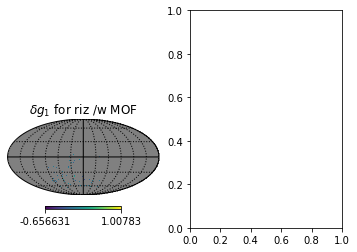

In [48]:
fig2,(ax1,ax2)=plt.subplots(ncols=2)

plt.axes(ax1)
hp.mollview(gng_filled_list[0]['delta_g1'].to_numpy(),nest=True,title="$\delta g_1$ for riz /w MOF",hold=True)
hp.graticule()

plt.axes(ax2)
hp.mollview(gng_filled_list[0]['star_density_piffv23'].to_numpy(),nest=True,
            title="Star density plotted on balrog pixels",hold=True)
hp.graticule()

# plt.title("Comparing $\delta g$ with other data")

plt.savefig('/home/cz136/project/balrog/image/hp/compare.png',dpi=2048)
plt.close()